<a href="https://colab.research.google.com/github/HongSeongMo/Bigdata_Analysis_Professional/blob/main/241022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import statsmodels.api as sm
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss

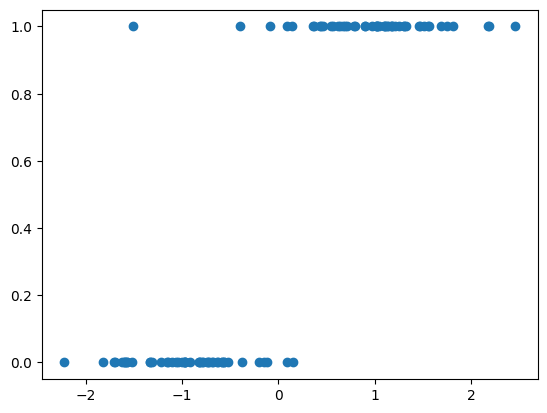

In [5]:
x1, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
plt.scatter(x1, y)

In [7]:
print(len(x1))
print(len(y))

100
100


In [8]:
print(x1[:5])

[[-0.56511345]
 [ 1.81256131]
 [-1.33619806]
 [ 1.74890611]
 [-0.19702637]]


In [9]:
print(y[:5])

[0 1 0 1 0]


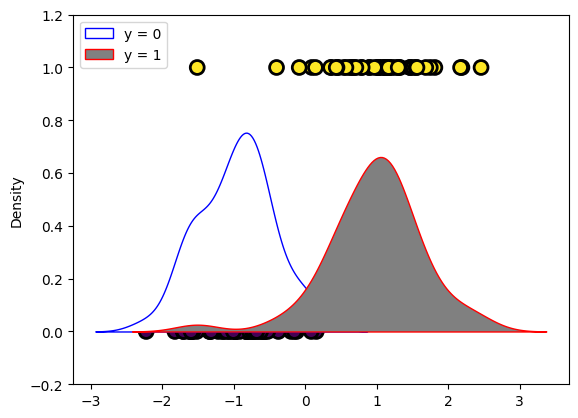

In [15]:
plt.scatter(x1, y, c=y, s=100, edgecolors='k', linewidths=2)
sns.kdeplot(x1[y == 0, :], label = 'y = 0', fill=True, ec='blue', fc='white')
sns.kdeplot(x1[y == 1, :], label = 'y = 1', fill=True, ec='red', fc='gray')
plt.legend(); plt.ylim(-0.2, 1.2)
plt.show()

In [16]:
x = sm.add_constant(x1)
print(x[:5])

[[ 1.         -0.56511345]
 [ 1.          1.81256131]
 [ 1.         -1.33619806]
 [ 1.          1.74890611]
 [ 1.         -0.19702637]]


In [18]:
logitmodel = sm.Logit(y, x)
results = logitmodel.fit(disp=0)
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Oct 2024   Pseudo R-squ.:                  0.7679
Time:                        05:26:16   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


In [19]:
print(results.fittedvalues[:10])

[-2.14361593  7.93353559 -5.41165604  7.66374973 -0.58357526 -3.86702227
  0.63906226 -3.21461146  4.57937202 -1.34248815]


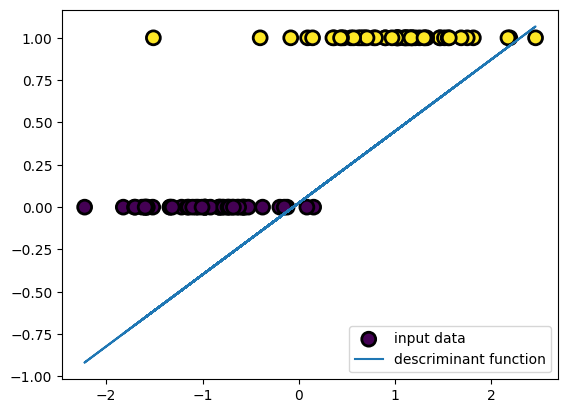

In [20]:
plt.scatter(x1, y, c=y, s=100, edgecolors='k', lw=2, label = 'input data')
plt.plot(x1, results.fittedvalues*0.1, label = 'descriminant function')
plt.legend()
plt.show()

In [21]:
ypred = results.predict(x)
print(log_loss(y, ypred, normalize=False))

16.084355200413036


In [23]:
from sklearn.datasets import load_iris
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
iris = load_iris()
x = iris.data
y = iris.target
dfx = pd.DataFrame(x, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=['species'])
df = pd.concat([dfx, dfy], axis=1)
df = df[['sepal length (cm)', 'species']]
df = df[df.species.isin([0,1])]
df = df.rename(columns={'sepal length (cm)': 'sepal_length'})
df.head()

,sepal_length,species
0,5.1,0
1,4.9,0
2,4.7,0
3,4.6,0
4,5.0,0


In [24]:
model = sm.Logit.from_formula("species ~ sepal_length", data=df)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Oct 2024   Pseudo R-squ.:                  0.5368
Time:                        06:16:36   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403

In [25]:
print(results.predict(df.sepal_length)[:10])

0    0.165794
1    0.066372
2    0.024798
3    0.014981
4    0.106237
5    0.481599
6    0.014981
7    0.106237
8    0.005411
9    0.066372
dtype: float64


In [26]:
ypred = results.predict(df.sepal_length) >= 0.5
print(ypred[:10])

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool


In [27]:
conf = confusion_matrix(df.species, ypred)
print(conf)

[[45  5]
 [ 6 44]]


In [28]:
print(classification_report(df.species, ypred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [29]:
print(f1_score(df.species, ypred))

0.8888888888888888


In [30]:
print(accuracy_score(df.species, ypred))

0.89


In [31]:
print(precision_score(df.species, ypred))

0.8979591836734694


In [32]:
print(recall_score(df.species, ypred))

0.88


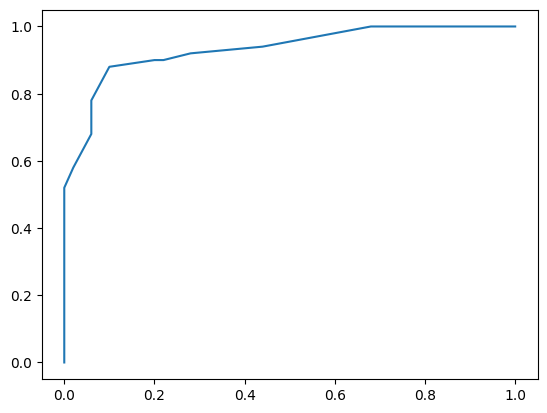

In [33]:
fpr, tpr, theilslopes = roc_curve(df.species, results.predict(df.sepal_length))
plt.plot(fpr, tpr)
plt.show()

In [35]:
print(auc(fpr, tpr))

0.9326


In [36]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
iris = load_iris()
x = iris.data
y = iris.target
dfx = pd.DataFrame(x, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=['species'])
df = pd.concat([dfx, dfy], axis=1)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  species
0                5.1               3.5                1.4               0.2        0
1                4.9               3.0                1.4               0.2        0
2                4.7               3.2                1.3               0.2        0
3                4.6               3.1                1.5               0.2        0
4                5.0               3.6                1.4               0.2        0


In [40]:
df_input = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
df_output = df[['species']].to_numpy()
trainx, testx, trainy, testy = train_test_split(df_input, df_output, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.transform(trainx)
testx_scale = scaler.transform(testx)
model = LogisticRegression(C=20, max_iter=1000)
model.fit(trainx_scale, trainy)
print(model.score(trainx_scale, trainy)*100)

98.21428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
print(model.score(testx_scale, testy)*100)

94.73684210526315


In [42]:
print(model.classes_)

[0 1 2]


In [43]:
print(model.coef_)

[[-1.60855849  2.5673491  -3.46427449 -3.29890685]
 [ 1.68929439 -0.94404732 -2.21385143 -1.51930692]
 [-0.0807359  -1.62330178  5.67812592  4.81821377]]


In [44]:
print(model.intercept_)

[ 0.46059623  4.1460987  -4.60669493]


In [46]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [49]:
iris = load_iris()
x = iris.data
y = iris.target
dfx = pd.DataFrame(x, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=['species'])
df = pd.concat([dfx, dfy], axis=1)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  species
0                5.1               3.5                1.4               0.2        0
1                4.9               3.0                1.4               0.2        0
2                4.7               3.2                1.3               0.2        0
3                4.6               3.1                1.5               0.2        0
4                5.0               3.6                1.4               0.2        0


In [56]:
df_input = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
df_output = df[['species']].to_numpy()
trainx, testx, trainy, testy = train_test_split(df_input, df_output, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.transform(trainx)
testx_scale = scaler.transform(testx)
print(type(trainx_scale))
print(testx_scale[0:5])
print(testx_scale[0:2, 1:3])
model = LogisticRegression(C=20, max_iter=1000)
results = model.fit(trainx_scale, trainy)
ypred = results.predict(testx_scale)
print(ypred)
print(ypred[:50])
conf = confusion_matrix(testy, ypred)
print(conf)

<class 'numpy.ndarray'>
[[-1.16389506  0.11304563 -1.30190881 -1.47297117]
 [-0.41400294  1.0015446  -1.4189813  -1.33674262]
 [-1.78880517 -0.33120386 -1.36044505 -1.33674262]
 [ 0.71083524  0.11304563  1.039541    0.84291414]
 [ 0.58585322  0.77941985  1.09807724  1.66028542]]
[[ 0.11304563 -1.30190881]
 [ 1.0015446  -1.4189813 ]]
[0 0 0 2 2 0 2 2 0 0 0 1 2 0 2 2 1 1 1 2 1 2 1 2 1 1 2 1 2 1 0 0 2 2 0 1 1
 0]
[0 0 0 2 2 0 2 2 0 0 0 1 2 0 2 2 1 1 1 2 1 2 1 2 1 1 2 1 2 1 0 0 2 2 0 1 1
 0]
[[12  1  0]
 [ 0 11  1]
 [ 0  0 13]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


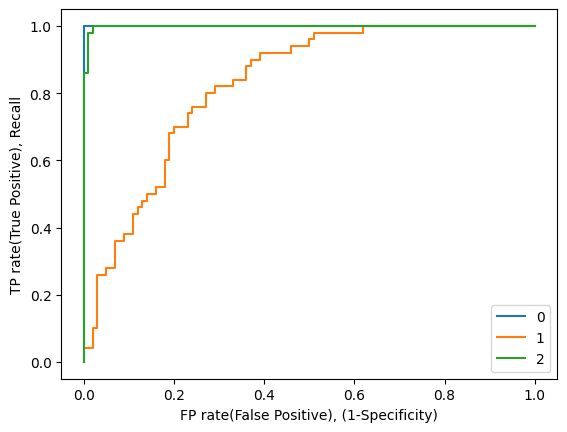

In [58]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
iris = load_iris()
x = iris.data
y = label_binarize(iris.target, classes=[0, 1, 2])
fpr =[None]*3
tpr =[None]*3
thr =[None]*3

for i in range(3):
    model = LogisticRegression(C=20, max_iter=1000).fit(x, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(x)[:, 1])
    plt.plot(fpr[i], tpr[i], label=i)
plt.xlabel('FP rate(False Positive), (1-Specificity)')
plt.ylabel('TP rate(True Positive), Recall')
plt.legend()
plt.show()

In [59]:
print('Class = 0 분류(setosa) 성능에 대한 AUC: ', end='')
print(auc(fpr[0], tpr[0]))
print('Class = 1 분류(versicolor) 성능에 대한 AUC: ', end='')
print(auc(fpr[1], tpr[1]))
print('Class = 2 분류(virginica) 성능에 대한 AUC: ', end='')
print(auc(fpr[2], tpr[2]))

Class = 0 분류(setosa) 성능에 대한 AUC: 1.0
Class = 1 분류(versicolor) 성능에 대한 AUC: 0.8258
Class = 2 분류(virginica) 성능에 대한 AUC: 0.9984


제4장 의사결정나무

In [62]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
iris = load_iris()
irisdata = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
irisdata['target'] = irisdata['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
irisdata.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [64]:
input = irisdata[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
output = irisdata[['target']].to_numpy()
print(input[:3])
print(output[:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[['setosa']
 ['setosa']
 ['setosa']]


In [65]:
trainx, testx, trainy, testy = train_test_split(input, output, test_size=0.3, random_state=55)
print(trainx.shape)
print(testx.shape)

(105, 4)
(45, 4)


In [66]:
print(trainx[:3])
print(trainy[:3])

[[5.8 2.7 5.1 1.9]
 [7.9 3.8 6.4 2. ]
 [6.5 3.2 5.1 2. ]]
[['virginica']
 ['virginica']
 ['virginica']]


In [67]:
print(testx[:3])
print(testy[:3])

[[4.9 3.1 1.5 0.1]
 [5.5 3.5 1.3 0.2]
 [4.4 2.9 1.4 0.2]]
[['setosa']
 ['setosa']
 ['setosa']]


In [68]:
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.transform(trainx)
testx_scale = scaler.transform(testx)
print(trainx_scale[:3])

[[-0.05116235 -0.80030739  0.79372328  0.95915486]
 [ 2.57239539  1.65156273  1.54767755  1.09397582]
 [ 0.8233569   0.31417903  0.79372328  1.09397582]]


In [69]:
print(testx_scale[:3])

[[-1.17554424  0.09128174 -1.29415007 -1.46762249]
 [-0.42595631  0.98287088 -1.41014304 -1.33280153]
 [-1.80020084 -0.35451282 -1.35214655 -1.33280153]]


In [71]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
iris = load_iris()
irisdata = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
irisdata['target'] = irisdata['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
input = irisdata[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
output = irisdata[['target']].to_numpy()
trainx, testx, trainy, testy = train_test_split(input, output, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.transform(trainx)
testx_scale = scaler.transform(testx)
model = DecisionTreeClassifier(random_state=55)
results = model.fit(trainx_scale, trainy)
print(100*model.score(trainx_scale, trainy))
print(100*model.score(testx_scale, testy))

100.0
95.55555555555556


In [72]:
print(model.feature_importances_)

[0.0214344  0.         0.42063137 0.55793422]


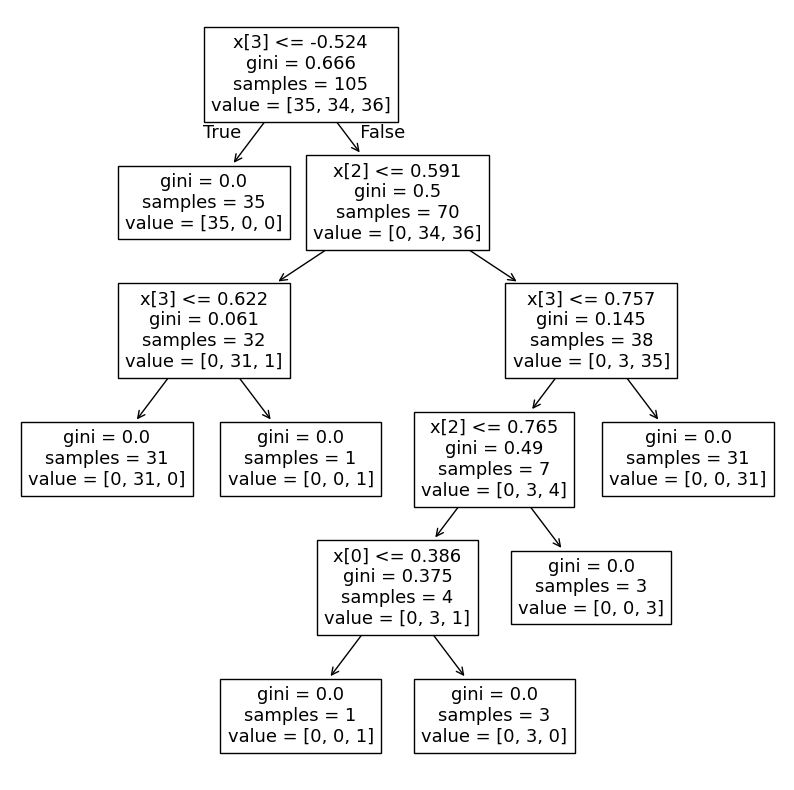

In [75]:
plt.figure(figsize=(10,10))
plot_tree(model)
plt.show()

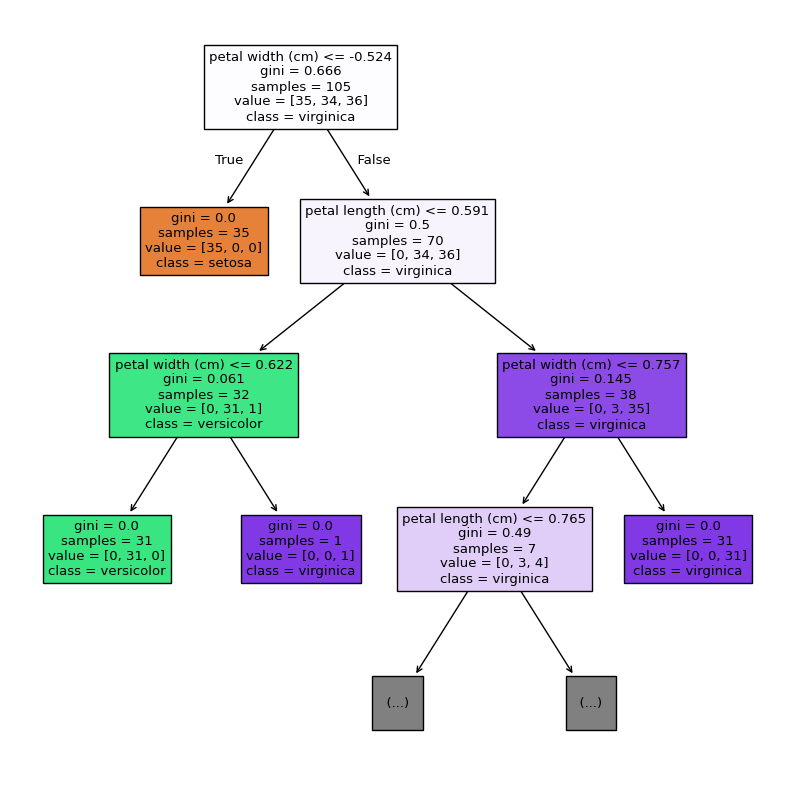

In [77]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
iris = load_iris()
irisdata = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
irisdata['target'] = irisdata['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
input = irisdata[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
output = irisdata[['target']].to_numpy()
trainx, testx, trainy, testy = train_test_split(input, output, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.transform(trainx)
testx_scale = scaler.transform(testx)
model = DecisionTreeClassifier(random_state=55)
results = model.fit(trainx_scale, trainy)
plt.figure(figsize=(10,10))
plot_tree(model, max_depth=3, filled=True, feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], class_names=['setosa', 'versicolor', 'virginica'])
plt.show()

In [79]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
iris = load_iris()
irisdata = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
irisdata['target'] = irisdata['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
input = irisdata[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
output = irisdata[['target']].to_numpy()
trainx, testx, trainy, testy = train_test_split(input, output, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.transform(trainx)
testx_scale = scaler.transform(testx)
model = DecisionTreeClassifier(max_depth=3, random_state=55)
results = model.fit(trainx_scale, trainy)

In [80]:
print(100*model.score(trainx_scale, trainy))
print(100*model.score(testx_scale, testy))
print(model.feature_importances_)

97.14285714285714
93.33333333333333
[0.         0.         0.41332275 0.58667725]


In [84]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
iris = load_iris()
irisdata = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
irisdata['target'] = irisdata['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
input = irisdata[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
output = irisdata[['target']].to_numpy()
trainx, testx, trainy, testy = train_test_split(input, output, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.transform(trainx)
testx_scale = scaler.transform(testx)
model = DecisionTreeClassifier(max_depth=3, random_state=55)
results = model.fit(trainx_scale, trainy)
print(results.predict([[2,3,4,5]]))

['virginica']


In [86]:
test_result = pd.DataFrame(np.zeros((45, 2)), columns = ['actual', 'predict'])
test_result['actual'] = pd.DataFrame(testy)
test_result['predict'] = results.predict(testx_scale)
print(test_result[:10])

      actual    predict
0     setosa     setosa
1     setosa     setosa
2     setosa     setosa
3  virginica  virginica
4  virginica  virginica
5     setosa     setosa
6  virginica  virginica
7  virginica  virginica
8     setosa     setosa
9     setosa     setosa


In [87]:
test_result['compare'] = test_result['actual'] == test_result['predict']
print(test_result.head())

      actual    predict  compare
0     setosa     setosa     True
1     setosa     setosa     True
2     setosa     setosa     True
3  virginica  virginica     True
4  virginica  virginica     True


In [88]:
accuracy = test_result['compare'].sum()/len(test_result)
print(accuracy*100)

93.33333333333333


In [93]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
iris = load_iris()
irisdata = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
irisdata['target'] = irisdata['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
input = irisdata[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
output = irisdata[['target']].to_numpy()
trainx, testx, trainy, testy = train_test_split(input, output, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.transform(trainx)
testx_scale = scaler.transform(testx)
model = DecisionTreeClassifier(max_depth=3, random_state=55)
results = model.fit(trainx_scale, trainy)
test_result = pd.DataFrame(np.zeros((45, 2)), columns = ['actual', 'predict'])
test_result['actual'] = pd.DataFrame(testy)
test_result['predict'] = results.predict(testx_scale)
conf = confusion_matrix(test_result['actual'], test_result['predict'])
print(conf)
print(classification_report(test_result['actual'], test_result['predict']))

[[15  0  0]
 [ 0 13  3]
 [ 0  0 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.81      0.90        16
   virginica       0.82      1.00      0.90        14

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



In [95]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# from sklearn.datasets import load_boston
boston = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/Boston.csv', index_col=0)
print(boston.head())
print(boston.info())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio   black  lstat  medv
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   4.98  24.0
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   9.14  21.6
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   4.03  34.7
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   2.94  33.4
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   5.33  36.2
<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age

In [96]:
input = boston.drop('medv', axis='columns')
output = boston['medv']
trainx, testx, trainy, testy = train_test_split(input, output, test_size=0.3, random_state=55)
model = DecisionTreeRegressor(max_depth=3, random_state=55)
results = model.fit(trainx, trainy)
print(model.score(trainx, trainy))
ypred = model.predict(testx)
print(ypred[:10])

0.8359449863708827
[22.61746988 12.70493827 22.61746988 22.61746988 22.61746988 22.61746988
 12.70493827 18.62692308 22.61746988 33.328     ]


In [97]:
mse = mean_squared_error(testy, ypred)
print(round(mse, 4))

31.935


In [98]:
mae = mean_absolute_error(testy, ypred)
print(round(mae, 4))

3.6877


In [99]:
print(100*model.score(trainx, trainy))

83.59449863708826


In [100]:
print(100*model.score(testx, testy))

55.88745046938448


In [101]:
print(model.feature_importances_)

[0.01243628 0.         0.         0.         0.06357346 0.66782966
 0.         0.07054655 0.         0.         0.         0.
 0.18561405]


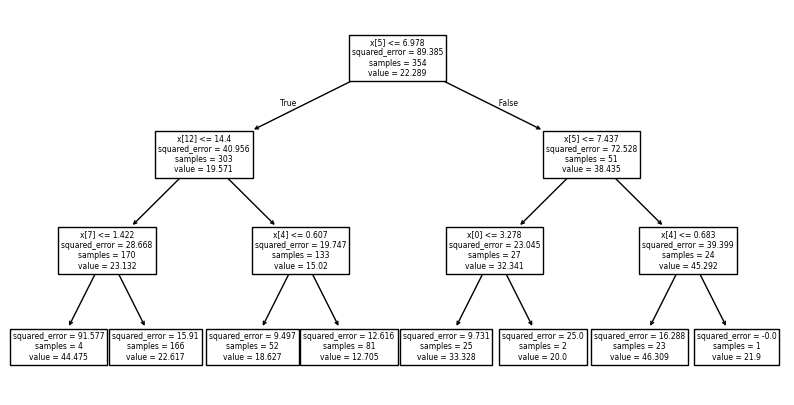

In [103]:
plt.figure(figsize=(10,5))
plot_tree(model)
plt.show()